# Titanic Dataset EDA (Boxplot)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
print("Count of Null values in various columns:-")
print(titanic.isnull().sum())

Count of Null values in various columns:-
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(method='ffill', inplace=True)
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)
titanic['embark_town'].fillna(method='ffill', inplace=True)
print("After filling Null values using various techniques:-")
print(titanic.isnull().sum())

After filling null values with various techniques:-
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [10]:
filtered_data=titanic[['sex','age','survived']]

In [11]:
filtered_data.head()

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0


<Figure size 1000x600 with 0 Axes>

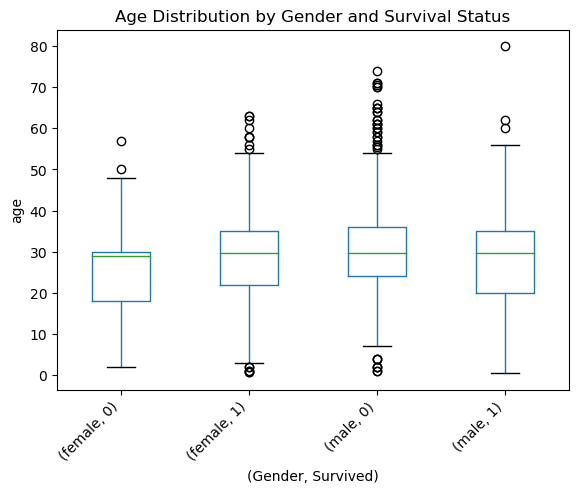

In [17]:
plt.figure(figsize=(10,6))
filtered_data.boxplot(column='age',by=['sex','survived'],grid=False)
plt.title('Age Distribution by Gender and Survival Status')
plt.suptitle("")
plt.xlabel('(Gender, Survived)')
plt.ylabel('age')
plt.xticks(rotation=45, ha='right')
plt.show()